In [2]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii, write_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator, SinkFillerBarnes, SinkFiller
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

from landlab.utils import watershed

In [2]:
# KID-13 wet season year 1
(mg_k13_20201109_sfm,z_k13_20201109_sfm) = read_esri_ascii("k13/wsyr1/k13_20201109_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20201109_lidar,z_k13_20201109_lidar) = read_esri_ascii("k13/wsyr1/k13_20201109_lidar.asc", \
    name='topographic__elevation')
(mg_k13_20210208_sfm,z_k13_20210208_sfm) = read_esri_ascii("k13/wsyr1/k13_20210208_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210406_sfm,z_k13_20210406_sfm) = read_esri_ascii("k13/wsyr1/k13_20210406_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210513_sfm,z_k13_20210513_sfm) = read_esri_ascii("k13/wsyr1/k13_20210513_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210513_lidar,z_k13_20210513_lidar) = read_esri_ascii("k13/wsyr1/k13_20210513_lidar.asc", \
    name='topographic__elevation')


# KID-13 dry season year 1
(mg_k13_20210604_sfm,z_k13_20210604_sfm) = read_esri_ascii("k13/dsyr1/k13_20210604_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210604_lidar,z_k13_20210604_lidar) = read_esri_ascii("k13/dsyr1/k13_20210604_lidar.asc", \
    name='topographic__elevation')
(mg_k13_20210819_sfm,z_k13_20210819_sfm) = read_esri_ascii("k13/dsyr1/k13_20210819_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210913_sfm,z_k13_20210913_sfm) = read_esri_ascii("k13/dsyr1/k13_20210913_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210913_lidar,z_k13_20210913_lidar) = read_esri_ascii("k13/dsyr1/k13_20210913_lidar.asc", \
    name='topographic__elevation')


# KID-13 wet season year 2
(mg_k13_20211007_sfm,z_k13_20211007_sfm) = read_esri_ascii("k13/wsyr2/k13_20211007_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20211007_lidar,z_k13_20211007_lidar) = read_esri_ascii("k13/wsyr2/k13_20211007_lidar.asc", \
    name='topographic__elevation')
(mg_k13_20220208_sfm,z_k13_20220208_sfm) = read_esri_ascii("k13/wsyr2/k13_20220208_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20220503_sfm,z_k13_20220503_sfm) = read_esri_ascii("k13/wsyr2/k13_20220503_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20220531_sfm,z_k13_20220531_sfm) = read_esri_ascii("k13/wsyr2/k13_20220531_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20220531_lidar,z_k13_20220531_lidar) = read_esri_ascii("k13/wsyr2/k13_20220531_lidar.asc", \
    name='topographic__elevation')

In [3]:
mg_k13_20201109_sfm.status_at_node[z_k13_20201109_sfm == -9999] = mg_k13_20201109_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20201109_lidar.status_at_node[z_k13_20201109_lidar == -9999] = mg_k13_20201109_lidar.BC_NODE_IS_FIXED_VALUE
mg_k13_20210208_sfm.status_at_node[z_k13_20210208_sfm == -9999] = mg_k13_20210208_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210406_sfm.status_at_node[z_k13_20210406_sfm == -9999] = mg_k13_20210406_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210513_sfm.status_at_node[z_k13_20210513_sfm == -9999] = mg_k13_20210513_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210513_lidar.status_at_node[z_k13_20210513_lidar == -9999] = mg_k13_20210513_lidar.BC_NODE_IS_FIXED_VALUE


mg_k13_20210604_sfm.status_at_node[z_k13_20210604_sfm == -9999] = mg_k13_20210604_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210604_lidar.status_at_node[z_k13_20210604_lidar == -9999] = mg_k13_20210604_lidar.BC_NODE_IS_FIXED_VALUE
mg_k13_20210819_sfm.status_at_node[z_k13_20210819_sfm == -9999] = mg_k13_20210819_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210913_sfm.status_at_node[z_k13_20210913_sfm == -9999] = mg_k13_20210913_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210913_lidar.status_at_node[z_k13_20210913_lidar == -9999] = mg_k13_20210913_lidar.BC_NODE_IS_FIXED_VALUE

mg_k13_20211007_sfm.status_at_node[z_k13_20211007_sfm == -9999] = mg_k13_20211007_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20211007_lidar.status_at_node[z_k13_20211007_lidar == -9999] = mg_k13_20211007_lidar.BC_NODE_IS_FIXED_VALUE
mg_k13_20220208_sfm.status_at_node[z_k13_20220208_sfm == -9999] = mg_k13_20220208_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20220503_sfm.status_at_node[z_k13_20220503_sfm == -9999] = mg_k13_20220503_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20220531_sfm.status_at_node[z_k13_20220531_sfm == -9999] = mg_k13_20220531_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20220531_lidar.status_at_node[z_k13_20220531_lidar == -9999] = mg_k13_20220531_lidar.BC_NODE_IS_FIXED_VALUE

In [4]:
fa_k13_20201109_sfm = FlowAccumulator(mg_k13_20201109_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20201109_lidar = FlowAccumulator(mg_k13_20201109_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210208_sfm = FlowAccumulator(mg_k13_20210208_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')                     
fa_k13_20210406_sfm = FlowAccumulator(mg_k13_20210406_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210513_sfm = FlowAccumulator(mg_k13_20210513_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210513_lidar = FlowAccumulator(mg_k13_20210513_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')




fa_k13_20210604_sfm = FlowAccumulator(mg_k13_20210604_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210604_lidar = FlowAccumulator(mg_k13_20210604_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210819_sfm = FlowAccumulator(mg_k13_20210819_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210913_sfm = FlowAccumulator(mg_k13_20210913_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210913_lidar = FlowAccumulator(mg_k13_20210913_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')


fa_k13_20211007_sfm = FlowAccumulator(mg_k13_20211007_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20211007_lidar = FlowAccumulator(mg_k13_20211007_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220208_sfm = FlowAccumulator(mg_k13_20220208_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220503_sfm = FlowAccumulator(mg_k13_20220503_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220531_sfm = FlowAccumulator(mg_k13_20220531_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220531_lidar = FlowAccumulator(mg_k13_20220531_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

In [5]:
(da_k13_20201109_sfm, discharge_k13_20201109_sfm) = fa_k13_20201109_sfm.accumulate_flow()
(da_k13_20201109_lidar, discharge_k13_20201109_lidar) = fa_k13_20201109_lidar.accumulate_flow()
(da_k13_20210208_sfm, discharge_k13_20210208_sfm) = fa_k13_20210208_sfm.accumulate_flow()
(da_k13_20210406_sfm, discharge_k13_20210406_sfm) = fa_k13_20210406_sfm.accumulate_flow()
(da_k13_20210513_sfm, discharge_k13_20210513_sfm) = fa_k13_20210513_sfm.accumulate_flow()
(da_k13_20210513_lidar, discharge_k13_20210513_lidar) = fa_k13_20210513_lidar.accumulate_flow()

(da_k13_20210604_sfm, discharge_k13_20210604_sfm) = fa_k13_20210604_sfm.accumulate_flow()
(da_k13_20210604_lidar, discharge_k13_20210604_lidar) = fa_k13_20210604_lidar.accumulate_flow()
(da_k13_20210819_sfm, discharge_k13_20210819_sfm) = fa_k13_20210819_sfm.accumulate_flow()
(da_k13_20210913_sfm, discharge_k13_20210913_sfm) = fa_k13_20210913_sfm.accumulate_flow()
(da_k13_20210913_lidar, discharge_k13_20210913_lidar) = fa_k13_20210913_lidar.accumulate_flow()

(da_k13_20211007_sfm, discharge_k13_20211007_sfm) = fa_k13_20211007_sfm.accumulate_flow()
(da_k13_20211007_lidar, discharge_k13_20211007_lidar) = fa_k13_20211007_lidar.accumulate_flow()
(da_k13_20220208_sfm, discharge_k13_20220208_sfm) = fa_k13_20220208_sfm.accumulate_flow()
(da_k13_20220503_sfm, discharge_k13_20220503_sfm) = fa_k13_20220503_sfm.accumulate_flow()
(da_k13_20220531_sfm, discharge_k13_20220531_sfm) = fa_k13_20220531_sfm.accumulate_flow()
(da_k13_20220531_lidar, discharge_k13_20220531_lidar) = fa_k13_20220531_lidar.accumulate_flow()

## KID-13 Wet1

In [6]:
len(mg_k13_20201109_sfm.core_nodes)*0.25*0.25

433.0

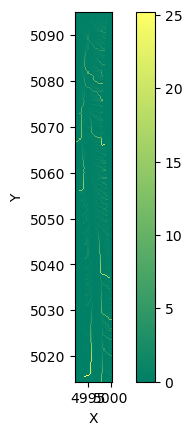

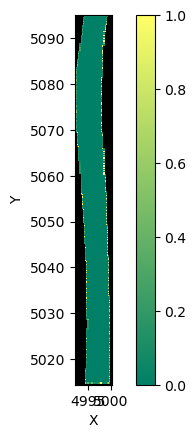

In [7]:
area = mg_k13_20201109_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20201109_sfm.node_has_boundary_neighbor(mg_k13_20201109_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
fig, ax = plt.subplots()
imshow_grid(mg_k13_20201109_sfm, mg_k13_20201109_sfm.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20201109_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20201109_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20201109_sfm.at_node['boundary_drainage'][mg_k13_20201109_sfm.status_at_node==mg_k13_20201109_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
fig, ax = plt.subplots()
imshow_grid(mg_k13_20201109_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

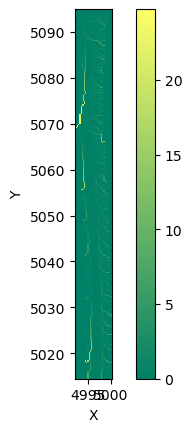

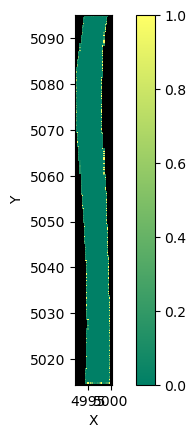

In [8]:
area = mg_k13_20201109_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20201109_lidar.node_has_boundary_neighbor(mg_k13_20201109_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
fig, ax = plt.subplots()
imshow_grid(mg_k13_20201109_lidar, mg_k13_20201109_lidar.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20201109_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20201109_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20201109_lidar.at_node['boundary_drainage'][mg_k13_20201109_lidar.status_at_node==mg_k13_20201109_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
fig, ax = plt.subplots()
imshow_grid(mg_k13_20201109_lidar, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

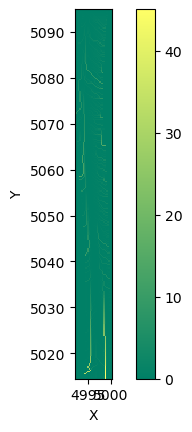

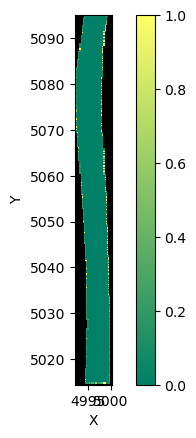

In [9]:
area = mg_k13_20210208_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210208_sfm.node_has_boundary_neighbor(mg_k13_20210208_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210208_sfm.imshow(mg_k13_20210208_sfm.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20210208_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210208_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20210208_sfm.at_node['boundary_drainage'][mg_k13_20210208_sfm.status_at_node==mg_k13_20210208_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20210208_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

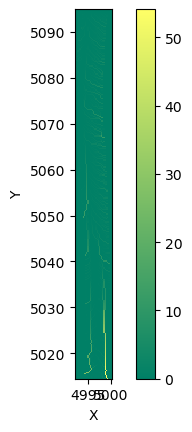

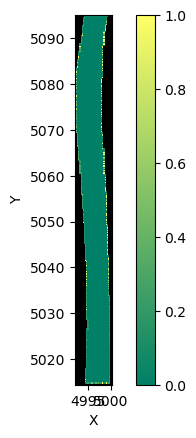

In [10]:
area = mg_k13_20210406_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210406_sfm.node_has_boundary_neighbor(mg_k13_20210406_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210406_sfm.imshow(mg_k13_20210406_sfm.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20210406_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210406_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20210406_sfm.at_node['boundary_drainage'][mg_k13_20210406_sfm.status_at_node==mg_k13_20210406_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20210406_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

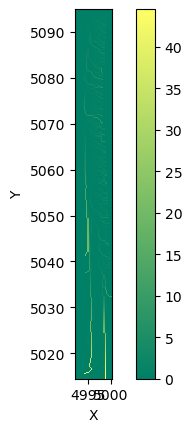

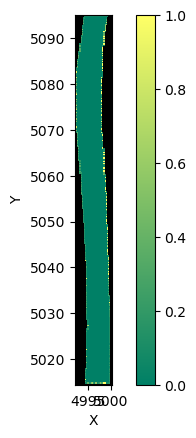

In [11]:
area = mg_k13_20210513_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210513_sfm.node_has_boundary_neighbor(mg_k13_20210513_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210513_sfm.imshow(mg_k13_20210513_sfm.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20210513_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210513_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20210513_sfm.at_node['boundary_drainage'][mg_k13_20210513_sfm.status_at_node==mg_k13_20210513_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20210513_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

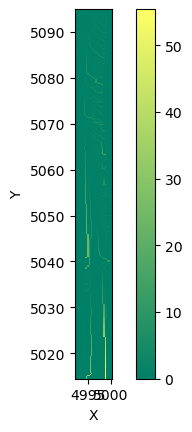

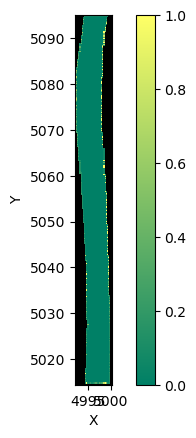

In [12]:
area = mg_k13_20210513_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210513_lidar.node_has_boundary_neighbor(mg_k13_20210513_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210513_lidar.imshow(mg_k13_20210513_lidar.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20210513_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210513_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20210513_lidar.at_node['boundary_drainage'][mg_k13_20210513_lidar.status_at_node==mg_k13_20210513_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20210513_lidar, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

In [13]:
mg_k13_20201109_sfm.at_node['boundary_drainage'][mg_k13_20201109_sfm.status_at_node==mg_k13_20201109_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20201109_lidar.at_node['boundary_drainage'][mg_k13_20201109_lidar.status_at_node==mg_k13_20201109_lidar.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20210208_sfm.at_node['boundary_drainage'][mg_k13_20210208_sfm.status_at_node==mg_k13_20210208_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20210406_sfm.at_node['boundary_drainage'][mg_k13_20210406_sfm.status_at_node==mg_k13_20210406_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20210513_sfm.at_node['boundary_drainage'][mg_k13_20210513_sfm.status_at_node==mg_k13_20210513_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20210513_lidar.at_node['boundary_drainage'][mg_k13_20210513_lidar.status_at_node==mg_k13_20210513_lidar.BC_NODE_IS_FIXED_VALUE] = 18000

In [14]:
write_esri_ascii('k13/wsyr1/out/mg_k13_20201109_sfm_drainage.asc',mg_k13_20201109_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20201109_lidar_drainage.asc',mg_k13_20201109_lidar,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210208_sfm_drainage.asc',mg_k13_20210208_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210406_sfm_drainage.asc',mg_k13_20210406_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210513_sfm_drainage.asc',mg_k13_20210513_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210513_lidar_drainage.asc',mg_k13_20210513_lidar,names='boundary_drainage',clobber=True)

write_esri_ascii('k13/wsyr1/out/mg_k13_20201109_sfm_drainage_map.asc',mg_k13_20201109_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20201109_lidar_drainage_map.asc',mg_k13_20201109_lidar,names='drainage_area',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210208_sfm_drainage_map.asc',mg_k13_20210208_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210406_sfm_drainage_map.asc',mg_k13_20210406_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210513_sfm_drainage_map.asc',mg_k13_20210513_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210513_lidar_drainage_map.asc',mg_k13_20210513_lidar,names='drainage_area',clobber=True)

['k13/wsyr1/out/mg_k13_20210513_lidar_drainage_map.asc']

## KID-13 Dry1

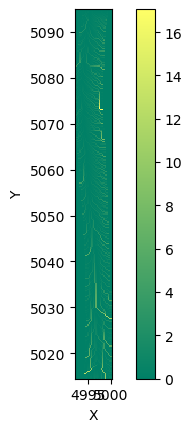

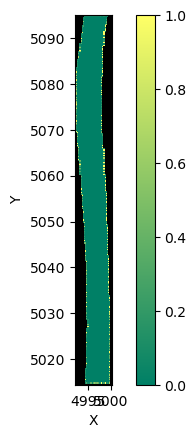

In [15]:
area = mg_k13_20210604_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210604_sfm.node_has_boundary_neighbor(mg_k13_20210604_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210604_sfm.imshow(mg_k13_20210604_sfm.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20210604_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210604_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20210604_sfm.at_node['boundary_drainage'][mg_k13_20210604_sfm.status_at_node==mg_k13_20210604_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20210604_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

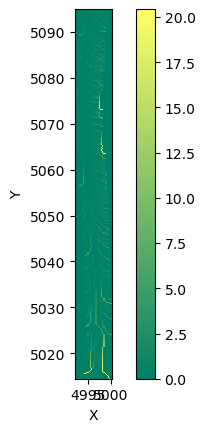

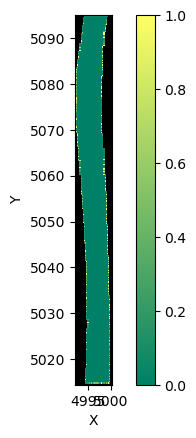

In [16]:
area = mg_k13_20210604_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210604_lidar.node_has_boundary_neighbor(mg_k13_20210604_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210604_lidar.imshow(mg_k13_20210604_lidar.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20210604_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210604_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20210604_lidar.at_node['boundary_drainage'][mg_k13_20210604_lidar.status_at_node==mg_k13_20210604_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20210604_lidar, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

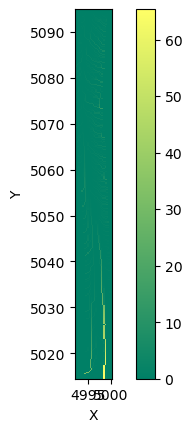

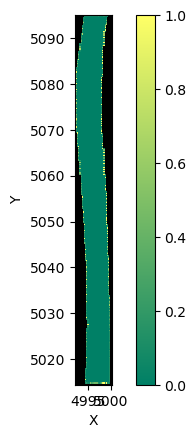

In [17]:
area = mg_k13_20210819_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210819_sfm.node_has_boundary_neighbor(mg_k13_20210819_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210819_sfm.imshow(mg_k13_20210819_sfm.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20210819_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210819_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20210819_sfm.at_node['boundary_drainage'][mg_k13_20210819_sfm.status_at_node==mg_k13_20210819_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20210819_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

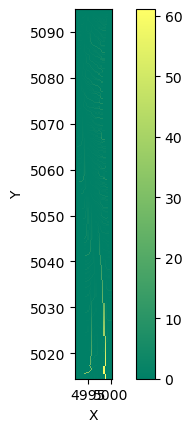

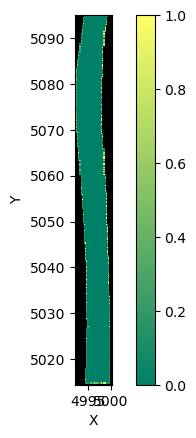

In [18]:
area = mg_k13_20210913_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210913_sfm.node_has_boundary_neighbor(mg_k13_20210913_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210913_sfm.imshow(mg_k13_20210913_sfm.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20210913_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210913_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20210913_sfm.at_node['boundary_drainage'][mg_k13_20210913_sfm.status_at_node==mg_k13_20210913_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20210913_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

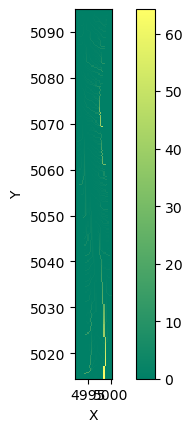

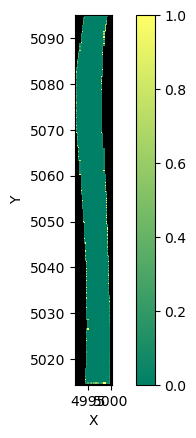

In [19]:
area = mg_k13_20210913_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210913_lidar.node_has_boundary_neighbor(mg_k13_20210913_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210913_lidar.imshow(mg_k13_20210913_lidar.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20210913_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210913_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20210913_lidar.at_node['boundary_drainage'][mg_k13_20210913_lidar.status_at_node==mg_k13_20210913_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20210913_lidar, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

In [20]:
mg_k13_20210604_sfm.at_node['boundary_drainage'][mg_k13_20210604_sfm.status_at_node==mg_k13_20210604_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20210604_sfm.at_node['boundary_drainage'][mg_k13_20210604_sfm.status_at_node==mg_k13_20210604_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20210819_sfm.at_node['boundary_drainage'][mg_k13_20210819_sfm.status_at_node==mg_k13_20210819_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20210913_sfm.at_node['boundary_drainage'][mg_k13_20210913_sfm.status_at_node==mg_k13_20210913_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20210913_sfm.at_node['boundary_drainage'][mg_k13_20210913_sfm.status_at_node==mg_k13_20210913_sfm.BC_NODE_IS_FIXED_VALUE] = 18000

In [21]:
write_esri_ascii('k13/dsyr1/out/mg_k13_20210604_sfm_drainage.asc',mg_k13_20210604_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/dsyr1/out/mg_k13_20210604_lidar_drainage.asc',mg_k13_20210604_lidar,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/dsyr1/out/mg_k13_20210819_sfm_drainage.asc',mg_k13_20210819_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/dsyr1/out/mg_k13_20210913_sfm_drainage.asc',mg_k13_20210913_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/dsyr1/out/mg_k13_20210913_lidar_drainage.asc',mg_k13_20210913_lidar,names='boundary_drainage',clobber=True)

write_esri_ascii('k13/dsyr1/out/mg_k13_20210604_sfm_drainage_map.asc',mg_k13_20210604_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/dsyr1/out/mg_k13_20210604_lidar_drainage_map.asc',mg_k13_20210604_lidar,names='drainage_area',clobber=True)
write_esri_ascii('k13/dsyr1/out/mg_k13_20210819_sfm_drainage_map.asc',mg_k13_20210819_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/dsyr1/out/mg_k13_20210913_sfm_drainage_map.asc',mg_k13_20210913_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/dsyr1/out/mg_k13_20210913_lidar_drainage_map.asc',mg_k13_20210913_lidar,names='drainage_area',clobber=True)

['k13/dsyr1/out/mg_k13_20210913_lidar_drainage_map.asc']

## KID-13 Wet2

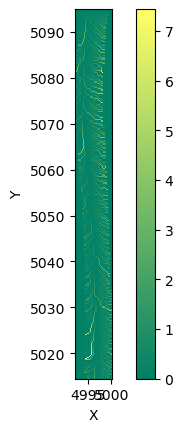

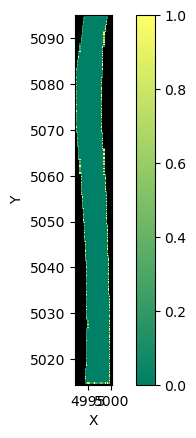

In [22]:
area = mg_k13_20211007_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20211007_sfm.node_has_boundary_neighbor(mg_k13_20211007_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20211007_sfm.imshow(mg_k13_20211007_sfm.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20211007_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20211007_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20211007_sfm.at_node['boundary_drainage'][mg_k13_20211007_sfm.status_at_node==mg_k13_20211007_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20211007_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

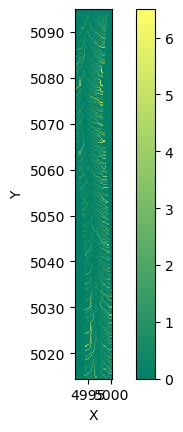

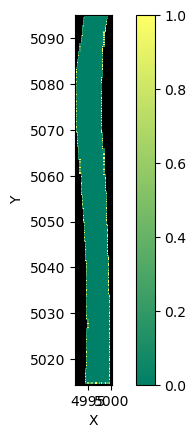

In [23]:
area = mg_k13_20211007_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20211007_lidar.node_has_boundary_neighbor(mg_k13_20211007_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20211007_lidar.imshow(mg_k13_20211007_lidar.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20211007_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20211007_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20211007_lidar.at_node['boundary_drainage'][mg_k13_20211007_lidar.status_at_node==mg_k13_20211007_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20211007_lidar, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

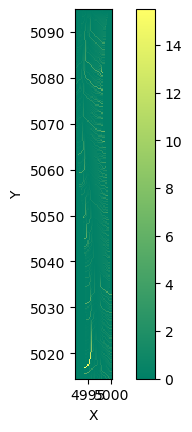

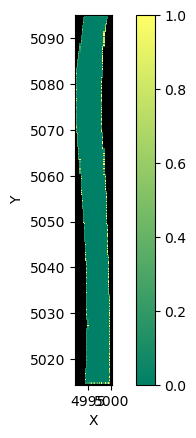

In [24]:
area = mg_k13_20220208_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20220208_sfm.node_has_boundary_neighbor(mg_k13_20220208_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20220208_sfm.imshow(mg_k13_20220208_sfm.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20220208_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20220208_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20220208_sfm.at_node['boundary_drainage'][mg_k13_20220208_sfm.status_at_node==mg_k13_20220208_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20220208_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

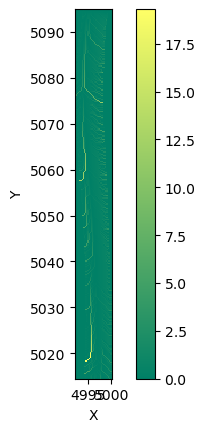

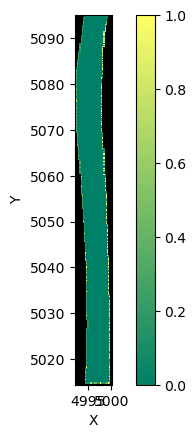

In [25]:
area = mg_k13_20220503_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20220503_sfm.node_has_boundary_neighbor(mg_k13_20220503_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20220503_sfm.imshow(mg_k13_20220503_sfm.at_node['drainage_area'], vmin=0, cmap = 'summer')
plt.show()

mask = np.zeros(len(mg_k13_20220503_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20220503_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20220503_sfm.at_node['boundary_drainage'][mg_k13_20220503_sfm.status_at_node==mg_k13_20220503_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20220503_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

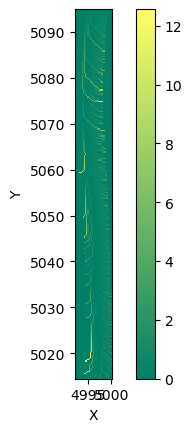

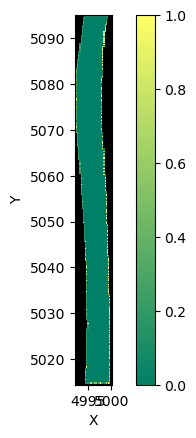

In [26]:
area = mg_k13_20220531_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20220531_sfm.node_has_boundary_neighbor(mg_k13_20220531_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20220531_sfm.imshow(mg_k13_20220531_sfm.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20220531_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20220531_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20220531_sfm.at_node['boundary_drainage'][mg_k13_20220531_sfm.status_at_node==mg_k13_20220531_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20220531_sfm, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

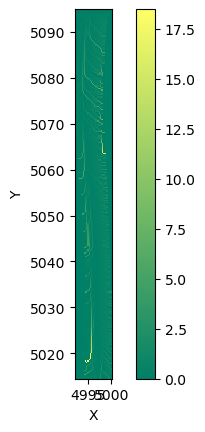

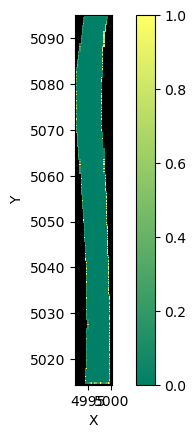

In [27]:
area = mg_k13_20220531_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20220531_lidar.node_has_boundary_neighbor(mg_k13_20220531_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20220531_lidar.imshow(mg_k13_20220531_lidar.at_node['drainage_area'], vmin=0, cmap='summer')
plt.show()

mask = np.zeros(len(mg_k13_20220531_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20220531_lidar.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_k13_20220531_lidar.at_node['boundary_drainage'][mg_k13_20220531_lidar.status_at_node==mg_k13_20220531_lidar.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_k13_20220531_lidar, 'boundary_drainage', vmin=0, vmax=1, cmap='summer')
plt.show()

In [28]:
mg_k13_20211007_sfm.at_node['boundary_drainage'][mg_k13_20211007_sfm.status_at_node==mg_k13_20211007_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20211007_lidar.at_node['boundary_drainage'][mg_k13_20211007_lidar.status_at_node==mg_k13_20211007_lidar.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20220208_sfm.at_node['boundary_drainage'][mg_k13_20220208_sfm.status_at_node==mg_k13_20220208_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20220503_sfm.at_node['boundary_drainage'][mg_k13_20220503_sfm.status_at_node==mg_k13_20220503_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20220531_sfm.at_node['boundary_drainage'][mg_k13_20220531_sfm.status_at_node==mg_k13_20220531_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_k13_20220531_lidar.at_node['boundary_drainage'][mg_k13_20220531_lidar.status_at_node==mg_k13_20220531_lidar.BC_NODE_IS_FIXED_VALUE] = 18000

In [29]:
write_esri_ascii('k13/wsyr2/out/mg_k13_20211007_sfm_drainage.asc',mg_k13_20211007_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20211007_lidar_drainage.asc',mg_k13_20211007_lidar,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220208_sfm_drainage.asc',mg_k13_20220208_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220503_sfm_drainage.asc',mg_k13_20220503_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220531_sfm_drainage.asc',mg_k13_20220531_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220531_lidar_drainage.asc',mg_k13_20220531_lidar,names='boundary_drainage',clobber=True)

write_esri_ascii('k13/wsyr2/out/mg_k13_20211007_sfm_drainage_map.asc',mg_k13_20211007_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20211007_lidar_drainage_map.asc',mg_k13_20211007_lidar,names='drainage_area',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220208_sfm_drainage_map.asc',mg_k13_20220208_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220503_sfm_drainage_map.asc',mg_k13_20220503_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220531_sfm_drainage_map.asc',mg_k13_20220531_sfm,names='drainage_area',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220531_lidar_drainage_map.asc',mg_k13_20220531_lidar,names='drainage_area',clobber=True)

['k13/wsyr2/out/mg_k13_20220531_lidar_drainage_map.asc']